In [1]:

import networkx as nx
import matplotlib.pyplot as plt

courses = ['111','120','124','125','126','307','308','309','324']
g = nx.DiGraph()
g.add_nodes_from(courses)

# 0 1 2 3 4 5 6 7 8
g.add_edge(courses[1],courses[2])
g.add_edge(courses[2],courses[3])
g.add_edge(courses[3],courses[4])
g.add_edge(courses[3],courses[5])
g.add_edge(courses[4],courses[6])
g.add_edge(courses[5],courses[7])
g.add_edge(courses[6],courses[7])
g.add_edge(courses[4],courses[8])

nx.draw(g,with_labels=True)
plt.draw()
plt.show()


<Figure size 640x480 with 1 Axes>

In [2]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import csv
 
# df = pd.read_excel('File.xlsx', sheetname='Sheet1')
 
# print("Column headings:")
# print(df.columns)

mydict = {} 
# num -> year -> percentage of enrollment

mydict2 = {}
# num -> year -> time -> percentage of enrollment

# ['Yr,Crs No,Section,Current Enrlmnt,Percentageof Enrollment,Limit/Est Enrlmnt,Start Time,End Time']
with open('project/su-1.csv', mode='r') as infile:
    reader = csv.reader(infile, delimiter='\t')
#     with open('coors_new.csv', mode='w') as outfile:
#         writer = csv.writer(outfile)
    i = 0
    for row in reader:
        if i == 0:
            i += 1
            continue
        
        tokens = row[0].split(",")
#         print(tokens)
        
        courseNo = tokens[1]
#         print(courseNo)
        year = tokens[0]
        perEnroll = tokens[4]
        
        secDict = {}
        if courseNo not in mydict.keys():
            allEnrolls = []
            allEnrolls.append(perEnroll)
            secDict[year] = allEnrolls
            mydict[courseNo] = secDict
#             print(mydict)
        else:
            secDict = mydict[courseNo]
#             print(secDict)
            allEnrolls = []
            if year in secDict.keys():
                allEnrolls = secDict[year]
            allEnrolls.append(perEnroll)
            
            secDict[year] = allEnrolls
#             print(secDict)
            mydict[courseNo] = secDict
#             print(mydict)
    
# print(mydict)
del mydict[""]
import json
with open('data.json', 'w') as outfile:
    json.dump(mydict, outfile)



In [3]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import csv
 
# df = pd.read_excel('File.xlsx', sheetname='Sheet1')
 
# print("Column headings:")
# print(df.columns)

mydict2 = {}
# num -> year -> time -> percentage of enrollment

# ['Yr,Crs No,Section,Current Enrlmnt,Percentageof Enrollment,Limit/Est Enrlmnt,Start Time,End Time']
with open('project/su-1.csv', mode='r') as infile:
    reader = csv.reader(infile, delimiter='\t')
#     with open('coors_new.csv', mode='w') as outfile:
#         writer = csv.writer(outfile)
    i = 0
    for row in reader:
        if i == 0:
            i += 1
            continue
        
        tokens = row[0].split(",")
#         print(tokens)
        
        courseNo = tokens[1]
#         print(courseNo)
        year = tokens[0]
        perEnroll = tokens[4]
        time = tokens[6]
        
        secDict = {} # year-> time -> percent. enrollment
        thirdDict = {} # time -> percent. enrollment
        if courseNo not in mydict2.keys():
            
            allEnrolls = []
            allEnrolls.append(perEnroll)
            thirdDict[time] = allEnrolls
            secDict[year] = thirdDict
            mydict2[courseNo] = secDict
            print(mydict2)
        else:
            secDict = mydict2[courseNo]
#             print(secDict)
            allEnrolls = []
            thirdDict = {}
            if year in secDict.keys():
                thirdDict = secDict[year]
                
            if time in thirdDict:
                allEnrolls = thirdDict[time]
                
            allEnrolls.append(perEnroll)
            thirdDict[time] = allEnrolls
            secDict[year] = thirdDict
#             print(secDict)
            mydict2[courseNo] = secDict
#             print(mydict)
    
# print(mydict)
del mydict2[""]
import json
with open('data2.json', 'w') as outfile:
    json.dump(mydict2, outfile)

{'111': {'2018': {'1050': ['32.5']}}}
{'111': {'2018': {'1050': ['32.5']}, '2017': {'1050': ['40']}, '2008': {'940': ['45.71428571'], '1050': ['60']}, '2009': {'1050': ['65.71428571']}, '2013': {'1050': ['67.5']}, '2016': {'1050': ['67.5']}, '2015': {'1050': ['70']}, '2011': {'1050': ['77.14285714']}, '2014': {'1050': ['77.5']}, '2010': {'1050': ['82.5']}, '2012': {'1050': ['95']}}, '120': {'2014': {'1050': ['28.57142857']}}}
{'111': {'2018': {'1050': ['32.5']}, '2017': {'1050': ['40']}, '2008': {'940': ['45.71428571'], '1050': ['60']}, '2009': {'1050': ['65.71428571']}, '2013': {'1050': ['67.5']}, '2016': {'1050': ['67.5']}, '2015': {'1050': ['70']}, '2011': {'1050': ['77.14285714']}, '2014': {'1050': ['77.5']}, '2010': {'1050': ['82.5']}, '2012': {'1050': ['95']}}, '120': {'2014': {'1050': ['28.57142857'], '1200': ['74.28571429']}, '2012': {'1050': ['42.85714286'], '1200': ['74.28571429'], '940': ['80']}, '2008': {'1050': ['57.14285714'], '940': ['71.42857143'], '1200': ['77.14285714

In [4]:
from tabulate import tabulate

for num in mydict.keys():
    secDictionary = mydict[num]
    line = []
    maxHeader = 1
    for year in sorted(secDictionary.keys()):
        row = []
        row.append(year)
        for enroll in secDictionary[year]:
            newEnroll = "%.2f" % float(enroll)
            if float(enroll) >= 57 and float(enroll) <= 80:
                newEnroll += "(\u2713)"
            else:
                newEnroll += "(\u2717)"
            row.append(newEnroll)
        line.append(row)
        if len(secDictionary[year]) > maxHeader:
            maxHeader = len(secDictionary[year])
        
    headers = []
    headers.append("year")
    for i in range(maxHeader):
        headers.append("Percent. Enrollment sec %d" % (i+1))
    
    print("Math " + num)
    print (tabulate(line, headers=headers))
    print()
    

Math 111
  year  Percent. Enrollment sec 1    Percent. Enrollment sec 2
------  ---------------------------  ---------------------------
  2008  45.71(✗)                     60.00(✓)
  2009  65.71(✓)
  2010  82.50(✗)
  2011  77.14(✓)
  2012  95.00(✗)
  2013  67.50(✓)
  2014  77.50(✓)
  2015  70.00(✓)
  2016  67.50(✓)
  2017  40.00(✗)
  2018  32.50(✗)

Math 120
  year  Percent. Enrollment sec 1    Percent. Enrollment sec 2    Percent. Enrollment sec 3
------  ---------------------------  ---------------------------  ---------------------------
  2008  57.14(✓)                     71.43(✓)                     77.14(✓)
  2009  72.00(✓)                     88.00(✗)                     104.00(✗)
  2010  60.00(✓)                     74.29(✓)
  2011  85.71(✗)                     97.14(✗)
  2012  42.86(✗)                     74.29(✓)                     80.00(✓)
  2013  62.86(✓)                     63.33(✓)
  2014  28.57(✗)                     74.29(✓)
  2015  91.43(✗)
  2016  85.71(✗)
  2017 

In [208]:
from tabulate import tabulate

for num in mydict2.keys():
    secDictionary = mydict2[num]
    line = []
    maxHeader = 1
    # year -> time -> percent. enrollment
    for year in sorted(secDictionary.keys()):
        thirdDict = secDictionary[year]
        row = []
        row.append(year)
        # time -> percent. enrollment
        for time in thirdDict.keys():
            enrolls = thirdDict[time]
            newEnrolls = ""
            for enroll in enrolls:
                newEnroll = "%.2f" % float(enroll)
                if float(enroll) >= 57 and float(enroll) <= 80:
                    newEnroll += "(" + time + "\u2713)"
                else:
                    newEnroll += "(" + time + "\u2717)"
                newEnrolls += " " + newEnroll
            row.append(newEnrolls.strip())


#         print(thirdDict)
        if len(secDictionary[year]) > maxHeader:
            maxHeader = len(secDictionary[year])
        line.append(row)
        
    headers = []
    headers.append("year")
    for i in range(maxHeader):
        headers.append("Percent. Enrollment sec %d" % (i+1))
    
    print("Math " + num)
    print (tabulate(line, headers=headers, tablefmt="latex"))
    print()
    

Math 111
\begin{tabular}{rll}
\hline
   year & Percent. Enrollment sec 1   & Percent. Enrollment sec 2   \\
\hline
   2008 & 45.71(940✗)                 & 60.00(1050✓)                \\
   2009 & 65.71(1050✓)                &                             \\
   2010 & 82.50(1050✗)                &                             \\
   2011 & 77.14(1050✓)                &                             \\
   2012 & 95.00(1050✗)                &                             \\
   2013 & 67.50(1050✓)                &                             \\
   2014 & 77.50(1050✓)                &                             \\
   2015 & 70.00(1050✓)                &                             \\
   2016 & 67.50(1050✓)                &                             \\
   2017 & 40.00(1050✗)                &                             \\
   2018 & 32.50(1050✗)                &                             \\
\hline
\end{tabular}

Math 120
\begin{tabular}{rlll}
\hline
   year & Percent. Enrollment sec 1   & Perc

In [205]:
# For num of sections

count = {}
# course -> year -> # sections

# num -> year -> time -> percentage of enrollment
for i in mydict2.keys():
    years = mydict2[i]
    # year -> time -> percentage of enrollment
    for y in years.keys():
        times = years[y]
        
        secCount = 0
        # time -> percentage of enrollment
        for t in times.keys():
            enrolls = times[t]
            secCount += len(enrolls)
        
        yCount = {}
        if i in count:
            yCount = count[i]
        
        yCount[y] = secCount
        count[i] = yCount

print(count)







{'111': {'2018': 1, '2017': 1, '2008': 2, '2009': 1, '2013': 1, '2016': 1, '2015': 1, '2011': 1, '2014': 1, '2010': 1, '2012': 1}, '120': {'2014': 2, '2012': 3, '2008': 3, '2010': 2, '2013': 2, '2009': 3, '2011': 2, '2016': 1, '2017': 1, '2015': 1, '2018': 1}, '124': {'2013': 4, '2014': 4, '2009': 4, '2017': 3, '2015': 4, '2008': 3, '2018': 3, '2011': 4, '2010': 4, '2012': 4, '2016': 3}, '125': {'2016': 4, '2008': 4, '2012': 5, '2013': 5, '2015': 4, '2011': 5, '2009': 4, '2010': 4, '2014': 4, '2017': 3, '2018': 3}, '126': {'2017': 5, '2018': 5, '2013': 6, '2012': 6, '2010': 5, '2014': 6, '2011': 6, '2008': 4, '2009': 4, '2016': 5, '2015': 6}, '307': {'2016': 5, '2017': 6, '2018': 6, '2012': 5, '2015': 6, '2008': 3, '2014': 5, '2010': 4, '2011': 5, '2009': 4, '2013': 5}, '308': {'2008': 5, '2017': 6, '2016': 6, '2014': 5, '2013': 6, '2015': 6, '2012': 4, '2010': 5, '2009': 6, '2011': 6, '2018': 6}, '309': {'2018': 3, '2012': 4, '2014': 4, '2017': 3, '2016': 3, '2013': 4, '2015': 3, '201

In [23]:
# Print count

lines = []
rows = []
# course -> year -> # sections
mydict3 = {}

for num in sorted(count):
    years = count[num]
    line = []
    temp = {}
    for y in sorted(years):
        row = []
        row.append(y)
        nSections = years[y]
        row.append(nSections)
        line.append(row)
        
        if num in mydict3:
            temp = mydict3[num]
        temp[y] = nSections

    mydict3[num] = temp
    
    headers = []
    headers.append("year")
    for i in range(1):
        headers.append("# sections")
    
#     print("Math " + num)
#     print (tabulate(line, headers=headers))
#     print()

print(mydict3)
# print(count)



{'111': {'2008': 2, '2009': 1, '2010': 1, '2011': 1, '2012': 1, '2013': 1, '2014': 1, '2015': 1, '2016': 1, '2017': 1, '2018': 1}, '120': {'2008': 3, '2009': 3, '2010': 2, '2011': 2, '2012': 3, '2013': 2, '2014': 2, '2015': 1, '2016': 1, '2017': 1, '2018': 1}, '124': {'2008': 3, '2009': 4, '2010': 4, '2011': 4, '2012': 4, '2013': 4, '2014': 4, '2015': 4, '2016': 3, '2017': 3, '2018': 3}, '125': {'2008': 4, '2009': 4, '2010': 4, '2011': 5, '2012': 5, '2013': 5, '2014': 4, '2015': 4, '2016': 4, '2017': 3, '2018': 3}, '126': {'2008': 4, '2009': 4, '2010': 5, '2011': 6, '2012': 6, '2013': 6, '2014': 6, '2015': 6, '2016': 5, '2017': 5, '2018': 5}, '307': {'2008': 3, '2009': 4, '2010': 4, '2011': 5, '2012': 5, '2013': 5, '2014': 5, '2015': 6, '2016': 5, '2017': 6, '2018': 6}, '308': {'2008': 5, '2009': 6, '2010': 5, '2011': 6, '2012': 4, '2013': 6, '2014': 5, '2015': 6, '2016': 6, '2017': 6, '2018': 6}, '309': {'2008': 1, '2009': 1, '2010': 2, '2011': 3, '2012': 4, '2013': 4, '2014': 4, '201

In [206]:
# year -> course -> # sections
mydict4 = {}
for num in mydict3:
    years = mydict3[num]
    
    for y in years:
        nSec = years[y]
        temp = {}
        if y in mydict4:
            temp = mydict4[y]
            
        temp[num] = nSec
        mydict4[y] = temp
        
# print(mydict4)

line = []
for y in sorted(mydict4):
    course = mydict4[y]

    row = []
    row.append(y)
    for i in sorted(course):
        nSections = course[i]
        row.append(nSections)
    
    line.append(row)
    
headers = []
headers.append("year")
for i in mydict4['2008'].keys():
    headers.append("Math " + str(i) + " # sections")

print("Math " + num)
print (tabulate(line, headers=headers))
print()

# f = open("table_#sections.txt", "w")
# f.write(tabulate(line, headers=headers))

Math 324
  year    Math 111 # sections    Math 120 # sections    Math 124 # sections    Math 125 # sections    Math 126 # sections    Math 307 # sections    Math 308 # sections    Math 309 # sections    Math 324 # sections
------  ---------------------  ---------------------  ---------------------  ---------------------  ---------------------  ---------------------  ---------------------  ---------------------  ---------------------
  2008                      2                      3                      3                      4                      4                      3                      5                      1                      4
  2009                      1                      3                      4                      4                      4                      4                      6                      1                      4
  2010                      1                      2                      4                      4                      5              

In [207]:
# please run only once
# reinitialize count again o/w
import math

s = {}
# course -> year -> appro. # sections

# count
# course -> year -> # sections

y2018 = {}

# course i -> year j -> appropriate # sections
for i in count.keys():
    years = count[i]
    years2 = mydict[i]
    temp = {}
#     print(years)
    for y in years:
        nSec = years[y]
        enrolls = years2[y]
        if y == '2018':
            y2018[i] = nSec
        
        c2Up = 0
        c2Lo = 0
        c1Up = 0
        c1Lo = 0
#         print(enrolls)
        for enroll in enrolls:
            enroll = float(enroll)
            if enroll >= 80 and enroll < 100:
                if len(enrolls) == 1:   
                    c1Up += 1
                else:
                    c2Up += 1
            elif enroll >= 29 and enroll < 57:
                c2Lo += 1
            elif enroll >= 100:
                c1Up += 1
            elif enroll < 29:
                c1Lo += 1
        if i in count:
            temp = count[i]
        temp[y] = nSec + 1 * float(c2Up) / 2.0 - 1 * float(c2Lo) / 2.0 + 1 * c1Up - 1 * c1Lo
        temp[y] = math.ceil(temp[y])
        if temp[y] - nSec > 1:
            temp[y] = nSec + 1
        elif nSec - temp[y] > 1:
            temp[y] = nSec - 1
        if temp[y] < 1:
            temp[y] = 1
        
#         print(nSec)
#         print(enrolls)
#         print(temp[y])
        
    s[i] = temp
print(s)

for i in s:
    
    headers = ['Year', 'Appr. # sections']
    data = sorted([(k,v) for k,v in s[i].items()]) # flip the code and name and sort
    print("Math" + i)
    print(tabulate(data, headers=headers))
    print()

{'111': {'2018': 1, '2017': 1, '2008': 2, '2009': 1, '2013': 1, '2016': 1, '2015': 1, '2011': 1, '2014': 1, '2010': 2, '2012': 2}, '120': {'2014': 1, '2012': 3, '2008': 3, '2010': 2, '2013': 2, '2009': 4, '2011': 3, '2016': 2, '2017': 2, '2015': 2, '2018': 2}, '124': {'2013': 3, '2014': 4, '2009': 4, '2017': 4, '2015': 4, '2008': 3, '2018': 3, '2011': 4, '2010': 5, '2012': 5, '2016': 4}, '125': {'2016': 4, '2008': 3, '2012': 5, '2013': 6, '2015': 5, '2011': 6, '2009': 5, '2010': 5, '2014': 5, '2017': 4, '2018': 4}, '126': {'2017': 5, '2018': 5, '2013': 7, '2012': 7, '2010': 6, '2014': 7, '2011': 7, '2008': 5, '2009': 5, '2016': 6, '2015': 7}, '307': {'2016': 6, '2017': 7, '2018': 7, '2012': 6, '2015': 7, '2008': 4, '2014': 6, '2010': 5, '2011': 6, '2009': 5, '2013': 6}, '308': {'2008': 4, '2017': 7, '2016': 7, '2014': 6, '2013': 7, '2015': 7, '2012': 5, '2010': 5, '2009': 7, '2011': 7, '2018': 7}, '309': {'2018': 3, '2012': 4, '2014': 3, '2017': 3, '2016': 3, '2013': 4, '2015': 3, '201

In [173]:
# weight
weigh = [float(x)/10 for x in range(1, 7)]
weigh.extend([0.8, 1.0, 1.2, 1.4, 1.6])

w = [float(x) / 10 / sum(weigh) for x in range(1, 7)]
w.extend([0.8 /sum(weigh), 1.0 / sum(weigh), 1.2 / sum(weigh), 1.4 / sum(weigh), 1.6 /sum(weigh)])
print(sum(weigh))
print(w)

# s = {}
# course -> year -> appro. # sections

S = {}
# course -> appro.# sections in 2019


for i in s:
    years = s[i]
    
    appSec = 0
    j = 0
#     print(years)
    for y in sorted(years):
        appYSec = years[y]
#         print(appYSec)
#         print(w[j])
        appSec += float(w[j]) * float(appYSec)
#         if i == '111':
#             print(appSec)
        j += 1
#         print(j)
    
#     if appSec < 1:
#         appSec = 1
    S[i] = "%.2f" % appSec
print(S)
print(y2018)


headers = ['Couse No.', 'Appr. # sections', '2018 # sections']
data = sorted([[k,v + " (" + u"\u2248" + str(int(float(v))) + ")"] for k,v in S.items()]) # flip the code and name and sort

added = False
j = 0
for i in y2018:
    for k in data:
        if not added:
            added = True
            data[j].append(y2018[i])
            j += 1
    added = False

# print("Math" + i)
print(tabulate(data, headers=headers, numalign="left"))
print()

with open("table_appro#sections.txt", "w") as f:
    f.write (tabulate(data, headers=headers, numalign="left"))
    
import csv

headers2 = ['Course', '# Sections']
data2 = sorted([[k,str(int(float(v)))] for k,v in S.items()]) # flip the code and name and sort
with open("table_csv.csv", "w") as f:
    f.write(tabulate(data2, headers=headers2, numalign="Left"))
        
# import csv

# with open('thefile.csv', 'rb') as f:
#   data = list(csv.reader(f))

8.1
[0.01234567901234568, 0.02469135802469136, 0.037037037037037035, 0.04938271604938272, 0.0617283950617284, 0.07407407407407407, 0.09876543209876544, 0.1234567901234568, 0.14814814814814814, 0.1728395061728395, 0.19753086419753088]
{'111': '1.11', '120': '2.07', '124': '3.81', '125': '4.58', '126': '6.00', '307': '6.41', '308': '6.67', '309': '3.10', '324': '4.38'}
{'111': 1, '120': 1, '124': 3, '125': 3, '126': 5, '307': 6, '308': 6, '309': 3, '324': 3}
Couse No.    Appr. # sections    2018 # sections
-----------  ------------------  -----------------
111          1.11 (≈1)           1
120          2.07 (≈2)           1
124          3.81 (≈3)           3
125          4.58 (≈4)           3
126          6.00 (≈6)           5
307          6.41 (≈6)           6
308          6.67 (≈6)           6
309          3.10 (≈3)           3
324          4.38 (≈4)           3



In [177]:
# tabulate to latex

# tablefmt="latex"
print (tabulate(data2, headers=headers2, tablefmt="latex"))
print()

\begin{tabular}{rr}
\hline
   Course &   number \\
\hline
      111 &        1 \\
      120 &        2 \\
      124 &        3 \\
      125 &        4 \\
      126 &        6 \\
      307 &        6 \\
      308 &        6 \\
      309 &        3 \\
      324 &        4 \\
\hline
\end{tabular}



TypeError: can only concatenate str (not "int") to str

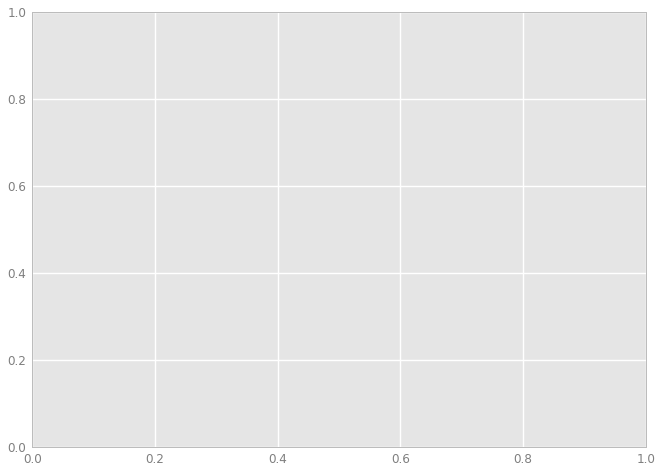

In [204]:
from pandas import Timestamp
from ggplot import *
# %matplotlib inline
# df = pd.DataFrame({headers[i] : data2[i] for i in range(len(headers2))})
# p = ggplot(aes('Couse No.'), data=df)
# p + geom_histogram(binwidth=1)